# Import Libraries

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [6]:
# Create Path
path=r'C:\Users\baidy\Downloads\citibike.csv'

In [7]:
# Import Dataset
citibike_df= pd.read_csv('citibike.csv')

In [8]:
citibike_df.shape

(50000, 18)

In [9]:
#Show first few rows
citibike_df.head()


,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0


# Data cleaning & consistency check

In [11]:
# 1. Check for duplicate records
dup_count=citibike_df.duplicated().sum()

In [12]:
dup_count

0

In [13]:
# 2.Check for missing values
missing_values=citibike_df.isnull().sum()

In [14]:
missing_values

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

In [15]:
# 3.Check Data types
citibike_df.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
dtype: object

In [16]:
# 4. Basic statistics for numerical columns
citibike_df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43021.000000,50000.000000
mean,17615.269360,14.145240,443.321500,40.734170,-73.991109,442.539700,40.733859,-73.991351,838.982900,1975.627786,1.073540
std,1675.407446,4.860541,356.559925,0.019911,0.012555,355.756022,0.019885,0.012569,573.663997,11.089001,0.589389
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000,0.000000
25%,16188.000000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1968.000000,1.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,1.000000
75%,19014.000000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1984.000000,1.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


# Analyse trip data and visualize distributions

In [18]:
# check for outliers in 'trip_duration'
citibike_df['trip_duration'].min()
citibike_df['trip_duration'].max()
citibike_df['trip_duration'].mean()
citibike_df['trip_duration'].median()

672.0

In [19]:
# check unique values for caregorical columns
citibike_df['weekday'].unique()

array(['Mon', 'Thu', 'Wed', 'Sat', 'Fri', 'Sun', 'Tue'], dtype=object)

In [20]:
citibike_df['subscriber'].unique()

array(['Subscriber', 'Non-Subscriber'], dtype=object)

In [21]:
citibike_df['gender'].unique()

array([2, 1, 0], dtype=int64)

In [22]:
# check the range of birth years
citibike_df['birth_year'].min()

1899.0

In [23]:
citibike_df['birth_year'].max()

1997.0

In [24]:
# no of missing birth yeara
citibike_df['birth_year'].isna().sum()

6979

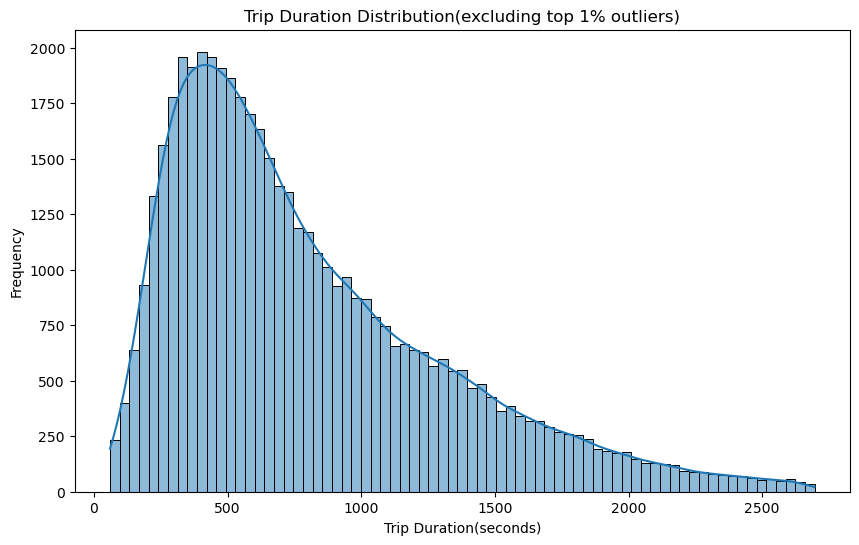

In [25]:
# Visualize trip distributions
plt.figure(figsize=(10,6))
# filter out extreme outliers for better visualization
trip_duration_filtered=citibike_df['trip_duration'][citibike_df['trip_duration']<citibike_df['trip_duration'].quantile(0.99)]
sns.histplot(trip_duration_filtered,kde=True)
plt.title('Trip Duration Distribution(excluding top 1% outliers)')
plt.xlabel('Trip Duration(seconds)')
plt.ylabel('Frequency')
plt.show()          

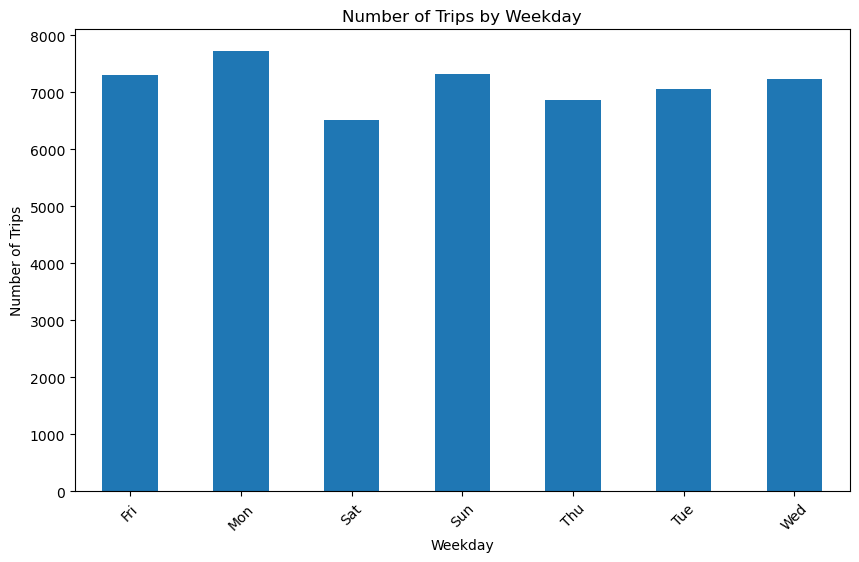

In [26]:
# Visualize trips by weekday
plt.figure(figsize=(10,6))
citibike_df['weekday'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Trips by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

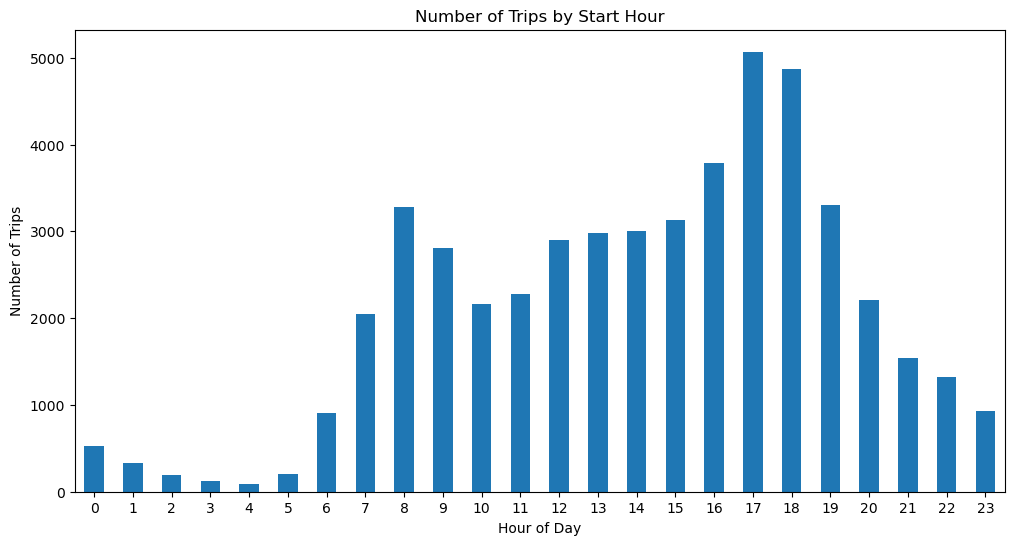

In [27]:
#Visualize Trips by hour
plt.figure(figsize=(12,6))
citibike_df['start_hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Trips by Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


## Clean the Data and handle the issues 

In [29]:
# Check extreme trip duration (potential errors)
p=[0.01,0.05,0.1,0.25,0.5,0.75,0.9, 0.95, 0.99]
citibike_df['trip_duration'].quantile(p)


0.01     123.00
0.05     214.00
0.10     274.00
0.25     417.00
0.50     672.00
0.75    1112.00
0.90    1640.10
0.95    2030.05
0.99    2697.00
Name: trip_duration, dtype: float64

In [30]:
# Check unrealistic birth year (Birth year distribution)
birth_year_counts=citibike_df['birth_year'].value_counts().sort_index().head(20)
birth_year_counts


birth_year
1899.0     8
1900.0     9
1901.0     5
1910.0     1
1917.0     1
1921.0     1
1922.0     3
1924.0     1
1926.0     1
1929.0     1
1932.0    10
1933.0     5
1934.0     2
1935.0    14
1936.0     4
1937.0     7
1938.0     7
1939.0     8
1940.0    20
1941.0    18
Name: count, dtype: int64

In [31]:
# Decode gender values(gender distribution)
gender_counts=citibike_df['gender'].value_counts()
gender_counts


gender
1    32361
2    10658
0     6981
Name: count, dtype: int64

In [32]:
# Create clean version of the dataset
df_clean=citibike_df.copy()

In [33]:
# convert timestamps to datetime
df_clean['start_time']=pd.to_datetime
df_clean['end_time']=pd.to_datetime

In [34]:
# filter out unrealistic birthyears( keeping only those between 1920-2005)
df_clean= df_clean[(df_clean['birth_year'].isna())|((df_clean['birth_year']>=1920)&(df_clean['birth_year']<=2005))]

In [35]:
# create age column (as of 2018, assuming the data is from 2018)
df_clean['age']=2018-df_clean['birth_year']

In [36]:
# Map gender codes to descriptive values
df_clean['gender_desc']=df_clean['gender'].map({0:'Unknown',1:'Male',2:'Female'})

In [37]:
# check the shape after clearing 
df_clean.shape

(49976, 20)

In [38]:
# show the clean data
df_clean.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,gender_desc
0,LnQzQk,16013,Mon,18,<function to_datetime at 0x000001E777F32FC0>,523,W 38 St & 8 Ave,40.754666,-73.991382,<function to_datetime at 0x000001E777F32FC0>,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,50.0,Female
1,IL9boN,15230,Thu,18,<function to_datetime at 0x000001E777F32FC0>,257,Lispenard St & Broadway,40.719392,-74.002472,<function to_datetime at 0x000001E777F32FC0>,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,35.0,Male
2,46clGB,17942,Wed,19,<function to_datetime at 0x000001E777F32FC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x000001E777F32FC0>,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,29.0,Male
3,v7vdFt,19683,Sat,11,<function to_datetime at 0x000001E777F32FC0>,527,E 33 St & 1 Ave,40.743156,-73.974347,<function to_datetime at 0x000001E777F32FC0>,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,30.0,Female
4,VGBsb5,18024,Sat,18,<function to_datetime at 0x000001E777F32FC0>,521,8 Ave & W 31 St,40.750450,-73.994811,<function to_datetime at 0x000001E777F32FC0>,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0,NaN,Unknown


In [39]:
# Save the clean dataset
df_clean.to_csv('citibike_cleaned.csv',index=False)

# Analyse citibike trip peterns and user demographics

In [41]:
# Analyze trip patterns by day of week and hours
weekday_hour_counts=df_clean.groupby(['weekday','start_hour']).size().unstack()

In [42]:
#Reorder weekdays
weekday_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_hour_counts=weekday_hour_counts.reindex(weekday_order)

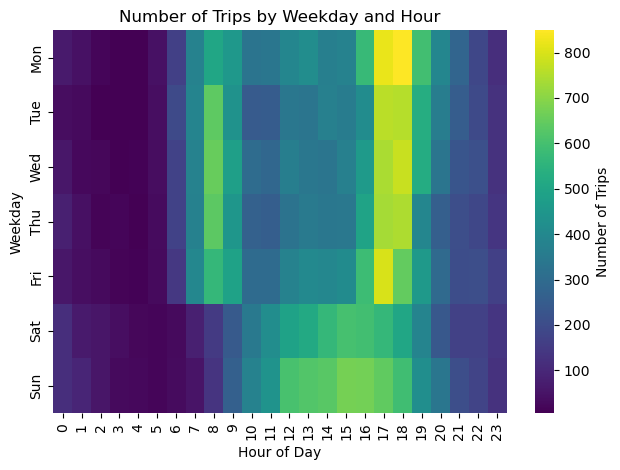

In [43]:
# Create heatmap
sns.heatmap(weekday_hour_counts,cmap='viridis',annot=False,fmt='d',cbar_kws={'label':'Number of Trips'})
plt.title('Number of Trips by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()

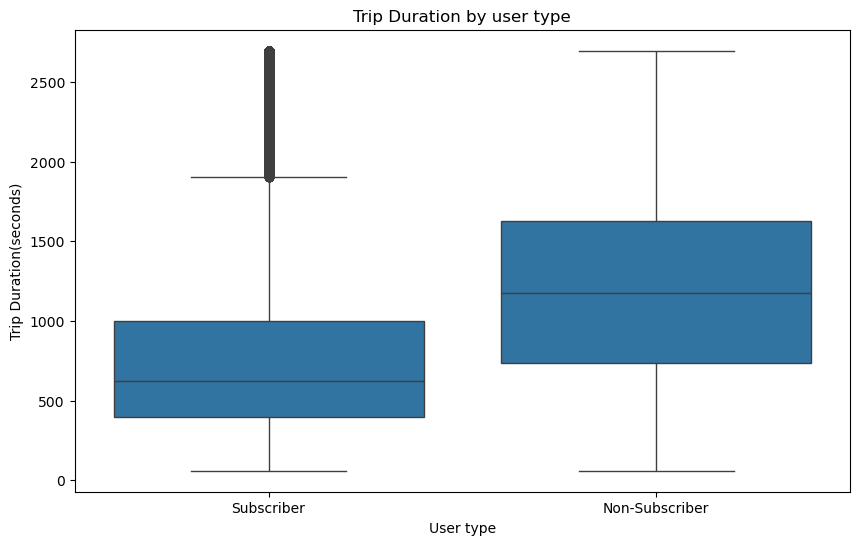

In [44]:
# Analyse trip duration by user type
plt.figure(figsize=(10,6))
sns.boxplot(x='subscriber',y='trip_duration', data=df_clean)
plt.title('Trip Duration by user type')
plt.xlabel('User type')
plt.ylabel('Trip Duration(seconds)')
plt.show()

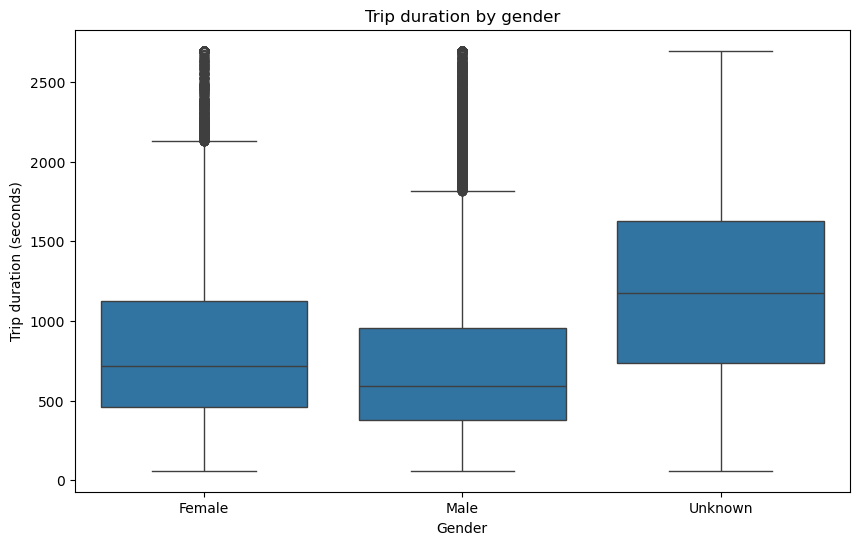

In [45]:
# Analyze Trip duration by gender
plt.figure(figsize=(10,6))
sns.boxplot(x='gender_desc',y='trip_duration', data=df_clean)
plt.title('Trip duration by gender')
plt.xlabel('Gender')
plt.ylabel('Trip duration (seconds)')
plt.show()

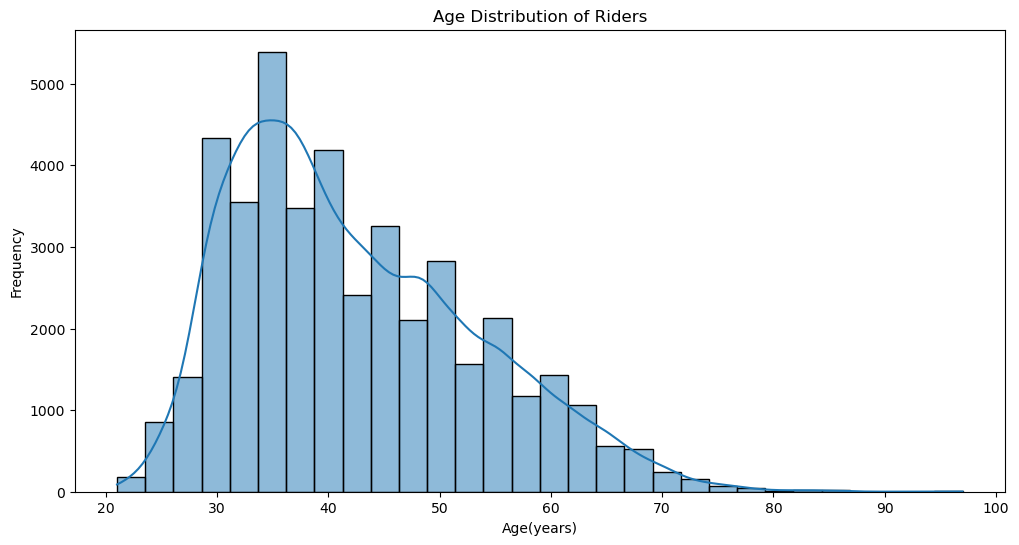

In [46]:
# Analyze age distribution of riders
plt.figure(figsize=(12,6))
# filter out missing age and unrealistic ages
age_data=df_clean[df_clean['age'].notna()&(df_clean['age']>0)&(df_clean['age']<100)]
sns.histplot(age_data['age'], bins=30, kde=True)
plt.title('Age Distribution of Riders')
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.show()

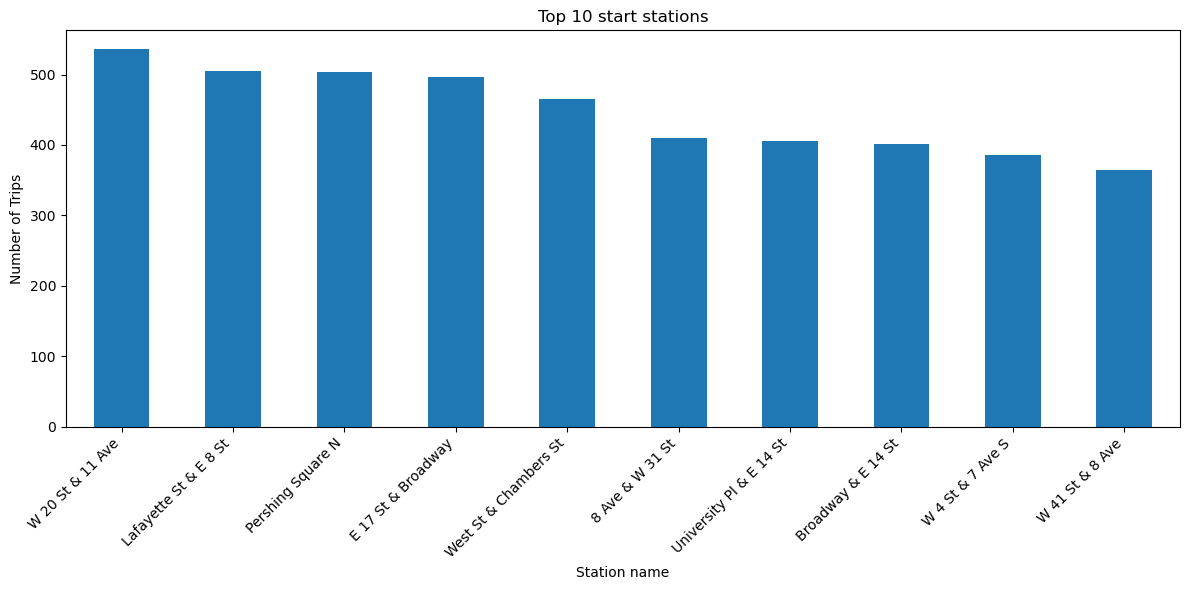

In [47]:
# Analyze popular stations
# Top 10 start stations
top_start_stations=df_clean['start_station_name'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_start_stations.plot(kind='bar')
plt.title('Top 10 start stations')
plt.xlabel('Station name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

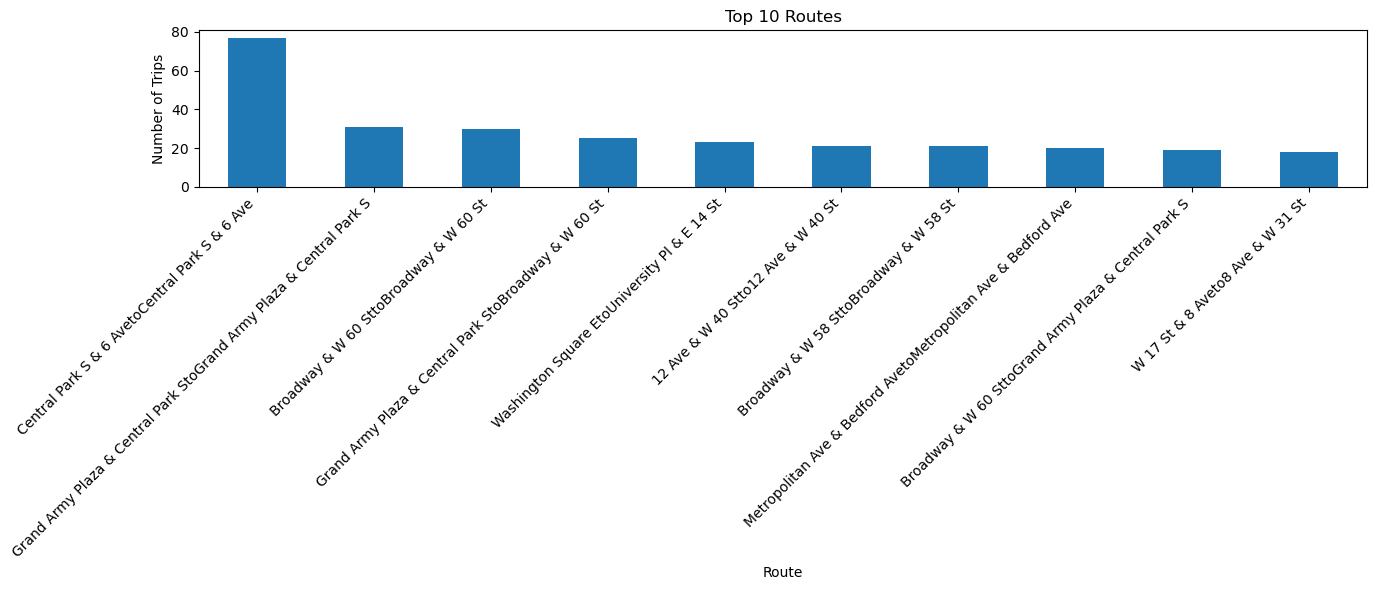

In [48]:
# Analyze trip routes( start-end station pairs)
# create a route column
df_clean['route']=df_clean['start_station_name']+'to'+df_clean['end_station_name']
top_routes=df_clean['route'].value_counts().head(10)
plt.figure(figsize=(14,6))
top_routes.plot(kind='bar')
plt.title('Top 10 Routes')
plt.xlabel('Route')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [49]:
# Map the most popular stations
# Create a dataframe of stations locations with trip counts
station_trips=df_clean['start_station_name'].value_counts().reset_index()
station_trips.columns=['station_name','trip_count']

In [50]:
# merge with station coordinates
station_locations=df_clean[['start_station_name','start_station_latitude','start_station_longitude']].drop_duplicates()
station_map_data=pd.merge(station_trips,station_locations,left_on='station_name',right_on='start_station_name')


In [51]:
# Get top 50 station for mapping
top_stations=station_map_data.head(50)

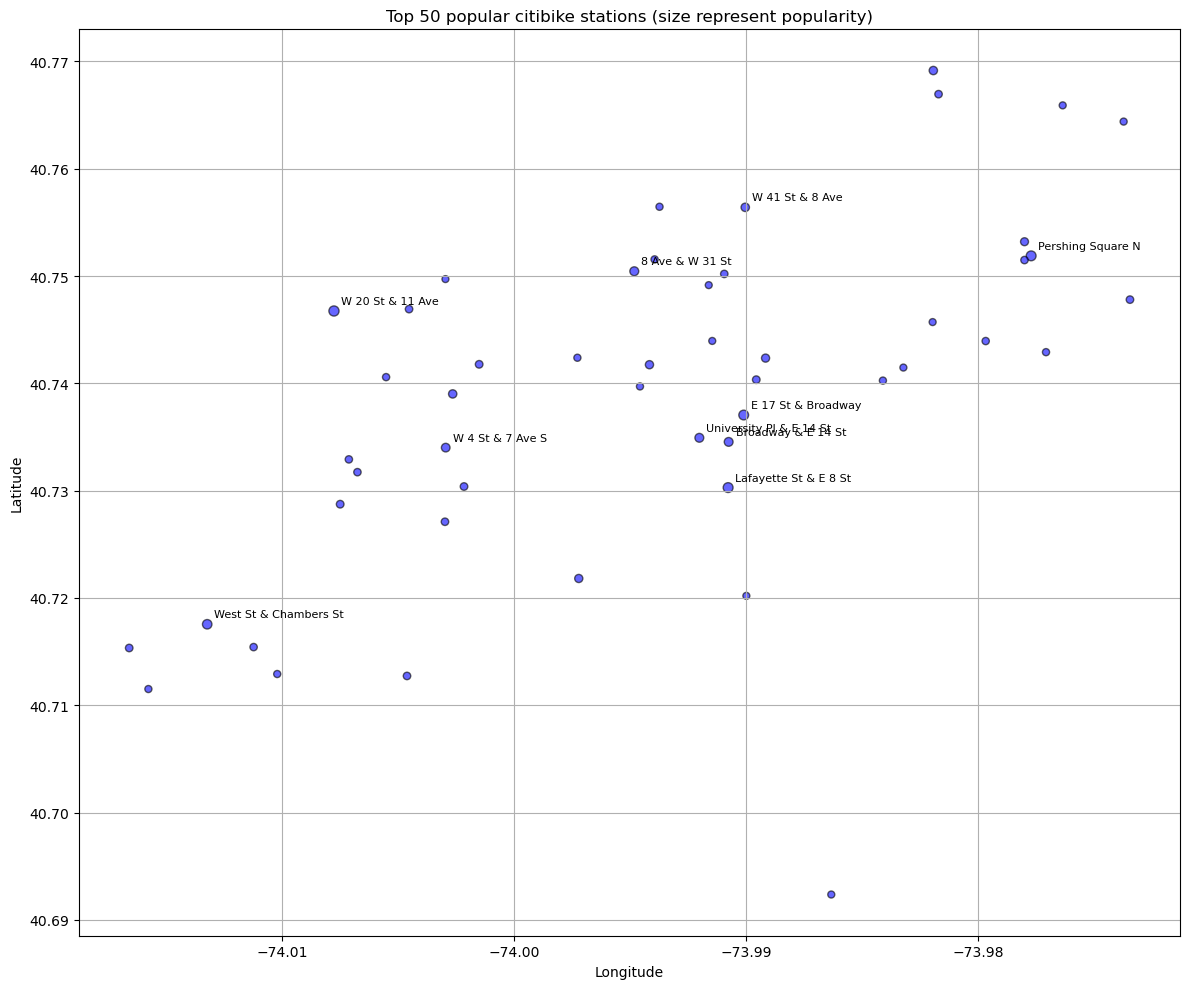

In [52]:
# create a map
plt.figure(figsize=(12,10))
plt.scatter(top_stations['start_station_longitude'],top_stations['start_station_latitude'], 
            s=top_stations['trip_count']/10,alpha=0.6, c='blue',edgecolors='black')
# Add labels for top 10 stations 
for i, row in top_stations.head(10).iterrows():
    plt.annotate(row['station_name'],
                 (row['start_station_longitude'],
                  row['start_station_latitude']),
                  xytext=(5,5),
                  textcoords='offset points',
                   fontsize=8)
    plt.title('Top 50 popular citibike stations (size represent popularity)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.tight_layout()
    

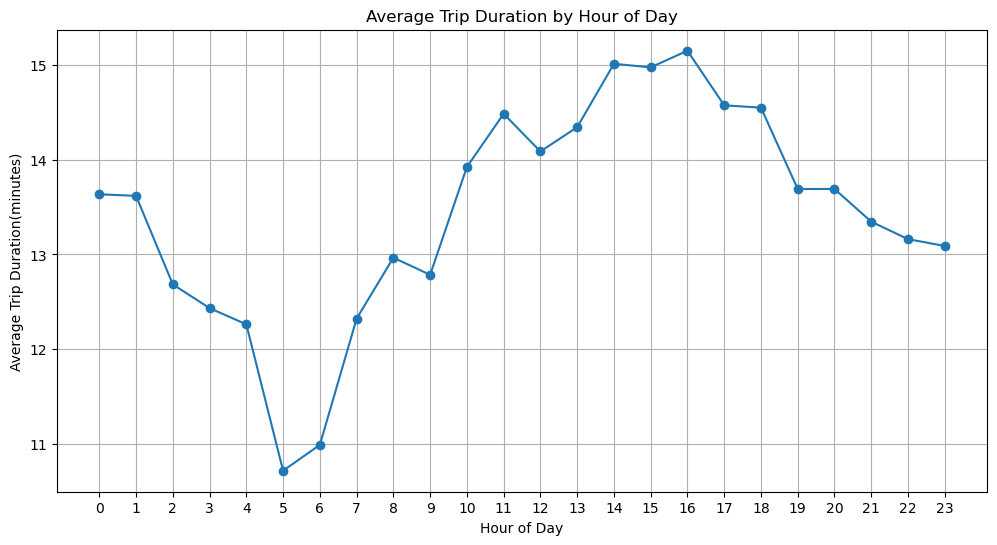

In [53]:
# Calculate average trip durationby hour of day
hourly_duration=df_clean.groupby('start_hour')['trip_duration'].mean()/60
plt.figure(figsize=(12,6))
hourly_duration.plot(kind='line', marker='o')
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration(minutes)')
plt.grid(True)
plt.xticks(range(24))
plt.show()

In [55]:
# Export the Dataset 
df_clean.to_pickle('df_clean.pkl')